<a href="https://colab.research.google.com/github/kavinda-athu/Image-processing-assignment2/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install circle_fit

  Created wheel for circle-fit: filename=circle_fit-0.1.3-py3-none-any.whl size=3482 sha256=dec8ee9ddc8b10a6338ff7b59a62f62dc2baa71b12f49c0a3a3ae7a9f3030a76
  Stored in directory: /root/.cache/pip/wheels/67/ff/bd/b5c2bbb2c7d2d09acc322a5f3bf9666b1121b0e17c0b31f5a2
Successfully built circle-fit


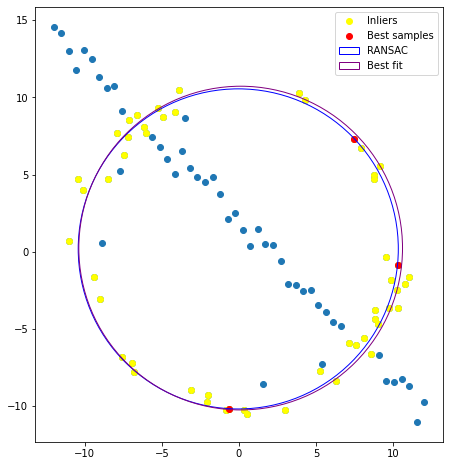

In [5]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import cv2 as cv
import circle_fit as cf
#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t), (r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x +b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

def cir_plot(Data,Datalst,color):
    p1,p2,p3=Datalst[Data[0]],Datalst[Data[1]],Datalst[Data[2]]
    cirx,ciry,r,p=cf.least_squares_circle([p1,p2,p3])
    c=plt.Circle((cirx,ciry),r,fill=False)
    c.set_color(color)
    return c

def RANSAC(Data,iter,thres,inliers_c):
    Max=0
    out=np.array([])
    for i in range(iter):
        randomP=np.random.choice(Data.size//2, size=3, replace=False)
        p1,p2,p3=Data[randomP[0]],Data[randomP[1]],Data[randomP[2]]
        cirx,ciry,r,p=cf.least_squares_circle([p1,p2,p3])
        T=np.array(abs(((Data[:,0]-cirx)**2+(Data[:,1]-ciry)**2)**0.5-r))
        if r>max(Data[:,1])*1.5:
            continue
        inliares=Data[T<thres]
        if len(inliares)>inliers_c:
            shrt_d=np.array(abs(((inliares[:,0]-cirx)**2+(inliares[:,1]-ciry)**2)**0.5-r))
            Mean = sum(shrt_d/shrt_d.size)
            if Max < len(inliares):
                out=randomP
                inli=inliares
                best=Mean
            elif Max == len(inliares) and best>Mean:
                out=randomP
                inli=inliares
                best=Mean
    return out,inli

Ran,best_inlier=RANSAC(X,500,1,40)         
c1=cir_plot(Ran,X, color = 'blue')
fig,ax=plt.subplots(figsize=(8,8))
ax.set_aspect( 1 )
ax.add_artist( c1 )

p1=ax.scatter(X[:,0],X[:,1])
inliers=ax.scatter(best_inlier[:,0],best_inlier[:,1], color='yellow' )

bestfit,inl=RANSAC(best_inlier,50,1,best_inlier.size//2.2)
c2=cir_plot(bestfit,best_inlier, color ='purple')
ax.add_artist( c2 )

Y=np.vstack((X[Ran[0]],X[Ran[1]],X[Ran[2]]))
best_samples=ax.scatter(Y[:,0],Y[:,1], c = 'r')
plt.legend(handles=[inliers,best_samples,c1,c2],labels=['Inliers','Best samples','RANSAC','Best fit'])
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


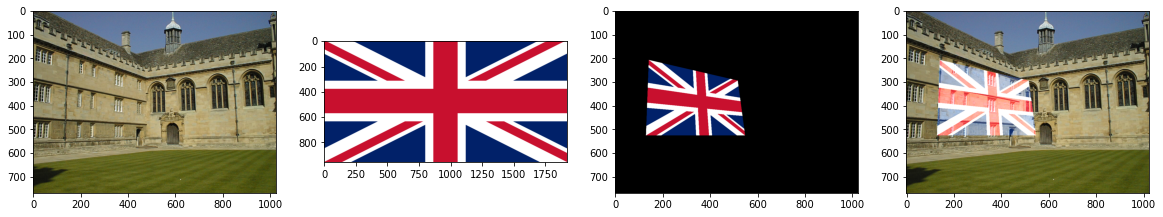

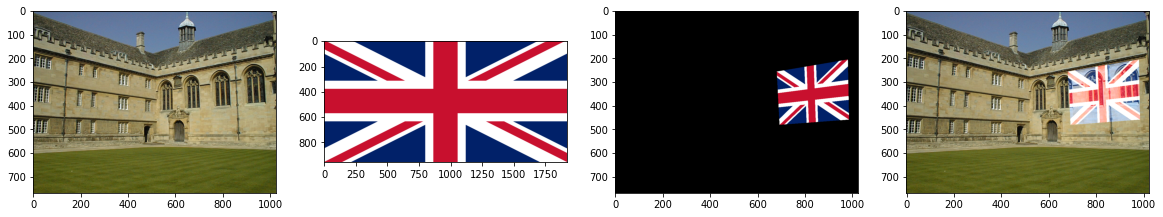

In [2]:
#Q2
import numpy as np
import cv2 as cv
import matplotlib . pyplot as plt

def warping_and_superimposing(img1,img2,p1,p2):
  imgmain = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
  imginsert = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
  fig, ax = plt.subplots(1,4,figsize=(20,20))
  ax[0].imshow(imgmain)
  ax[1].imshow(imginsert)
  P, mask = cv.findHomography(p1, p2, cv.RANSAC, 5.0)
  h,w,l=imgmain.shape
  warped = cv.warpPerspective(imginsert, P, (w, h))
  ax[2].imshow(warped)
  superimposed = cv.addWeighted(imgmain,1,warped,0.9,1)
  ax[3].imshow(superimposed)
  plt.show()

#1
img1 =cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/building1.jpg')
img2 = cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/flag.png')
p1 = np.array([[0,0], [0,960],[1920,0], [1920,960]])
p2 = np.array([[142,206],[130,525], [517,293],[548,525]])
warping_and_superimposing(img1,img2  ,p1,p2)

#2
img1 =cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/building2.jpg')
img2 = cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment2/flag.png')
p1 = np.array([[0,0], [0,960],[1920,0], [1920,960]])
p2 = np.array([[681,255],[693,480], [981,204],[986,458]])
warping_and_superimposing(img1,img2  ,p1,p2)